<a href="https://colab.research.google.com/github/tinouirini/Homework/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_Homework_Lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Για να φτιάξουμε wordclouds από κείμενα άρθρων χρειαζόμαστε τις παρακάτω βιβλιοθήκες, τις οποίες εισάγουμε όλες μαζί στην αρχή.

Εάν έχουμε ελληνικά κείμενα:
- βγάζουμε το # από την αρχή της παρακάτω εντολής (κάνουμε δλδ uncomment) και τρέχουμε το κελί
- όταν τελειώσει:
1. ξαναβάζουμε το # (κάνουμε comment)
2. Runtime -> Restart session and run all (ανανεώνουμε το session για να ξέρει ότι τώρα έχουμε και το λεξικό της βιβλιοθήκης spacy)

In [ ]:
#!python -m spacy download el_core_news_sm

### ΕΙΣΑΓΩΓΗ ΒΙΒΛΙΟΘΗΚΩΝ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# εάν έχουμε αγγλικά κείμενα
from wordcloud import WordCloud, STOPWORDS

# εάν έχουμε ελληνικά κείμενα
import spacy

In [ ]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

### ΔΗΜΙΟΥΡΓΙΑ DATAFRAME

Αρχικά, φέρνουμε τα δεδομένα μας (αρχεία xlsx ή csv) και τα ανεβάζουμε στο drive μας.

Στη συνέχεια, εισάγουμε τα δεδομένα μας στην python (φτιάχνουμε dataframes).

Στην αριστερή μπάρα στο colab:
- πατάτε το εικονίδιο του φακέλου (τελευταίο εικονίδιο)
- πατάτε το εικονίδιο του φακέλου με το σήμα του google drive και συνδέεστε στο drive σας
- AN TO KANETE ΓΙΑ ΠΡΩΤΗ ΦΟΡΑ στον υπολογιστή σας, θα σας πει να τρέξετε ένα κελί που δημιουργεί για να συνδεθείτε στο drive σας - Μόλις το τρέξετε θα σας ανοίξει ένα παράθυρο για να αποδεχθείτε τη σύνδεση
- πατάτε το φάκελο του drive και του MyDrive
- ΑΝ ΔΕΝ ΥΠΑΡΧΕΙ ο φάκελος του Drive, κάνετε Refresh το tab στον browser και θα εμφανιστεί
- πατάτε στο φάκελο που έχετε ανεβάσει το xlsx της efsyn
- εντοπίζετε το xslx, βάζετε πάνω του το πονίκι και πατάτε στις 3 τελίτσες που εμφανίζονται δεξιά του ονόματος του αρχείου
- πατάτε copy path στο μενού που εμφανίζεται

Σε ένα νέο κελί γράφετε:

```
df = pd.read_excel(<κάνετε paste το path που κάνατε copy στο τελευταίο παραπάνω βήμα, μέσα σε εισαγωγικά>)
```

In [ ]:
# δημιουργία dataframe από το αρχείο των δεδομένων μας
df = pd.read_csv('/content/drive/MyDrive/skai.gr-MAY23 (1).csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### MISSING VALUES

Επειδή τα δεδομένα μας είναι πιθανό να έχουν ελλείπουσες τιμές (missing values), δηλαδή μπορεί να μην υπάρχει μια ημερομηνία σε ένα άρθρο ή ένας τίτλος ή οτιδήποτε, για να μην μας χτυπάει ο κώδικας παρακάτω, πετάμε απ' την αρχή όσα rows έχουν κενές τιμές (nan), με την παρακάτω εντολή:
```
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
df.dropna(inplace=True)
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
df = df.reset_index(drop=True)
```
Εννοείται ότι στη θέση του df βάζουμε το όνομα που δώσαμε στο dataframe μας.

In [ ]:
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
df.dropna(inplace=True)

In [ ]:
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
df = df.reset_index(drop=True)

### ΕΠΙΣΚΟΠΗΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Εξετάζουμε το dataframe για να κατανοήσουμε τι περιέχουν τα δεδομένα μας, με εργαλεία που έχουμε μάθει όπως, τα head(), shape, describe(), columns, unique() κλπ.

In [ ]:
df. head()

,site,url,date,section,title,author,text
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
1,skai.gr,https://www.skai.gr/news/world/meksiko-18-tour...,2023-05-01,Κόσμος,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,ΑΠΕ-ΜΠΕ,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
2,skai.gr,https://www.skai.gr/news/greece/eortologio-poi...,2023-05-01,Ελλάδα,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά",skai.gr,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της..."
3,skai.gr,https://www.skai.gr/news/world/soudan-i-vretan...,2023-05-01,Κόσμος,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,ΑΠΕ-ΜΠΕ,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...
4,skai.gr,https://www.skai.gr/news/greece/fotia-ta-ksime...,2023-05-01,Ελλάδα,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,skai.gr,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...


In [ ]:
df.tail()

,site,url,date,section,title,author,text,datetime,year,month,hour,day
4978,skai.gr,https://www.skai.gr/news/politics/androulakis-...,2023-05-31,Πολιτική,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,ΑΠΕ-ΜΠΕ,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε...",2023-05-31,2023,5,0,31
4979,skai.gr,https://www.skai.gr/news/sports/apotheosi-vero...,2023-05-31,Αθλητικά,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,skai.gr,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...,2023-05-31,2023,5,0,31
4980,skai.gr,https://www.skai.gr/news/world/san-simera-i-la...,2023-05-31,Κόσμος,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,skai.gr,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...,2023-05-31,2023,5,0,31
4981,skai.gr,https://www.skai.gr/news/world/germania-epithy...,2023-05-31,Κόσμος,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,ΑΠΕ-ΜΠΕ,Το Κυπριακό και οι ελληνοτουρκικές σχέσεις συμ...,2023-05-31,2023,5,0,31
4982,skai.gr,https://www.skai.gr/news/politics/paylos-marin...,2023-05-31,Πολιτική,Παύλος Μαρινάκης: Για ποιον λόγο αποσύρθηκε το...,skai.gr,«Μετά από τις κωμικοτραγικές αντιφάσεις των στ...,2023-05-31,2023,5,0,31


In [ ]:
df.columns

Index(['site', 'url', 'date', 'section', 'title', 'author', 'text'], dtype='object')

In [ ]:
df.describe()

,datetime,year,month
count,4983,4983.0,4983.0
mean,2023-05-16 14:02:05.707405312,2023.0,5.0
min,2023-05-01 00:00:00,2023.0,5.0
25%,2023-05-09 00:00:00,2023.0,5.0
50%,2023-05-17 00:00:00,2023.0,5.0
75%,2023-05-24 00:00:00,2023.0,5.0
max,2023-05-31 00:00:00,2023.0,5.0
std,NaN,0.0,0.0


### ΣΥΝΕΝΩΣΗ ΣΤΗΛΩΝ ΚΕΙΜΕΝΩΝ

Αν θέλουμε να ενώσουμε κείμενα από δυο ή περισσότερες στήλες και να τα σώσουμε σε μια νέα στήλη, (π.χ. τον τίτλο με το κείμενο του άρθρου), μπορούμε να το κάνουμε ή με απλή πρόσθεση των επιθυμητών στηλών και πρόσθεση κενού ανάμεσά τους:

```
df["full_text"] = df["title"] + " " + df["body_text"]
```
ή με το aggregate

```
df['full_text'] = df[['title', 'body_text']].agg(' '.join, axis=1)
```

### DATETIME

Για να μπορούμε να κάνουμε αναλύσεις βάσει του χρόνου, μετατρέπουμε τις ημερομηνίες από string σε datetime, με την εντολή:

```
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
```
Στο παραπάνω παράδειγμα, η νέα στήλη που φτιάχνουμε θα λέγεται 'datetime', η υπάρχουσα στήλη των ημερομηνιών στο df μας λέγεται 'date' και η μορφή των ημερομηνιών που περιέχει είναι: ΕΤΟΣ-ΜΗΝΑΣ-ΗΜΕΡΑ ΩΡΑ:ΛΕΠΤΑ (π.χ. 2024-06-05 13:41)

H μορφή των ημερομηνιών στη στήλη 'date', καθορίζει το format='', που θα βάλουμε μέσα στην παρέμθεση στην εντολή μας. Κάθε site ή εφαρμογή επιλέγει τον τρόπο παρουσίασης των ημερομηνιών που του αρέσει (π.χ. κάποιος βάζει τις ημερομηνίες στη μορφή: 5 Ιουνίου 2024)

Τους κωδικούς για το format θα τους βρείτε εδώ: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [ ]:
# Μετατροπή της στήλης των ημερομηνιών σε datetime
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

Αφού μετατρέψουμε τις ημερομηνίες σε datetime, τώρα μπορούμε να φτιάξουμε στήλες με τα έτη, τους μήνες, τις μέρες κλπ.

```
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
```

In [ ]:
# στήλη έτους
df['year'] = pd.DatetimeIndex(df['datetime']).year
# στήλη μήνα
df['month'] = pd.DatetimeIndex(df['datetime']).month
# κλπ.

In [ ]:
df['hour'] = pd.DatetimeIndex(df['datetime']).hour

In [ ]:
df['day'] = pd.DatetimeIndex(df['datetime']).day

### ΓΡΑΦΗΜΑΤΑ ΠΕΡΙΓΡΑΦΙΚΗΣ ΑΝΑΛΥΣΗΣ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

Με τις τεχνικές φιλτραρίσματος, σορταρίσματος και γκρουπαρίσματος που έχουμε μάθει, μπορούμε να φτιάξουμε γραφήματα που να απαντούν ερωτήματα όπως:

- ποιο είναι το πλήθος της αρθρογραφίας ανά ώρα;
- ποιο είναι το πλήθος της αρθρογραφίας ανά θεματική κατηγορία; ανά συντάκτη;
- πώς μεταβάλεται το πλήθος της αρθρογραφίας από μέρα σε μέρα; συνολικά και ανά κατηγορία;
- ποιοι είναι οι πολυγραφέστεροι συντάκτες;

In [ ]:
#ποιο είναι το πλήθος της αρθρογραφίας ανά μέρα;-Σε αυτο το σαιτ δεν εμφανιζεται η ωρα
daily_counts = df.groupby('day').size().reset_index(name='count')


daily_counts

,day,count
0,1,51
1,2,126
2,3,158
3,4,206
4,5,315
5,6,98
6,7,96
7,8,173
8,9,113
9,10,201


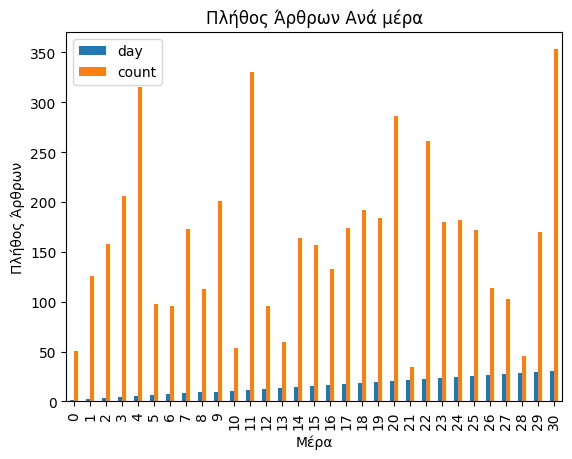

In [ ]:
daily_counts.plot(kind='bar', xlabel='Μέρα', ylabel='Πλήθος Άρθρων', title='Πλήθος Άρθρων Ανά μέρα')
plt.show()

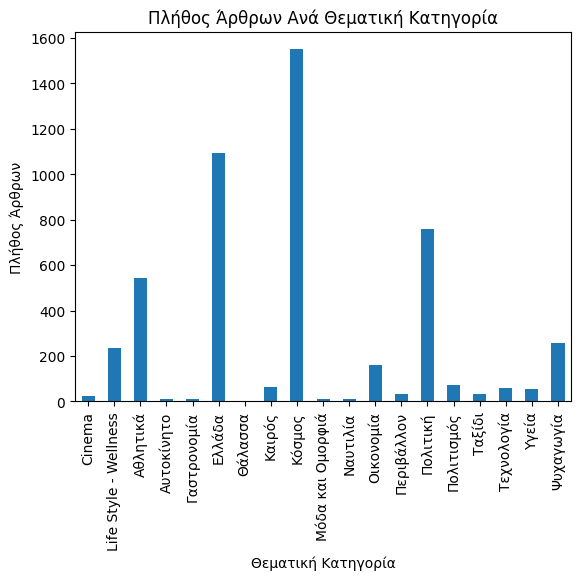

In [ ]:
#ποιο είναι το πλήθος της αρθρογραφίας ανά θεματική κατηγορία;
articles_per_category = df.groupby('section').size()
articles_per_category.plot(kind='bar', xlabel='Θεματική Κατηγορία', ylabel='Πλήθος Άρθρων', title='Πλήθος Άρθρων Ανά Θεματική Κατηγορία')
plt.show()

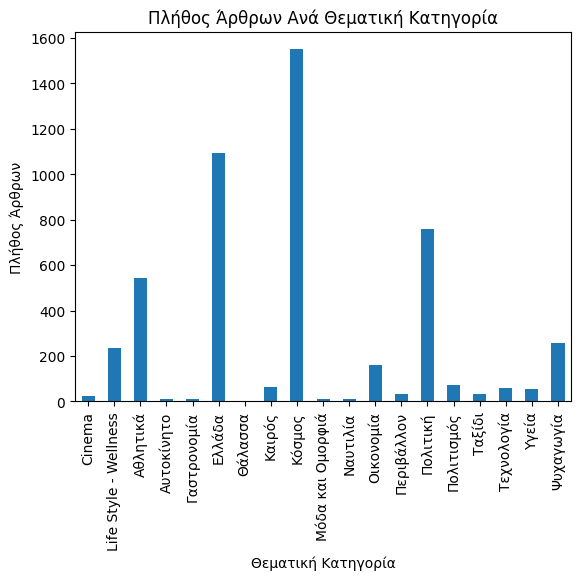

In [ ]:
#ποιο είναι το πλήθος της αρθρογραφίας ανά συντάκτη;
articles_per_category.plot(kind='bar', xlabel='Θεματική Κατηγορία', ylabel='Πλήθος Άρθρων', title='Πλήθος Άρθρων Ανά Θεματική Κατηγορία')
plt.show()

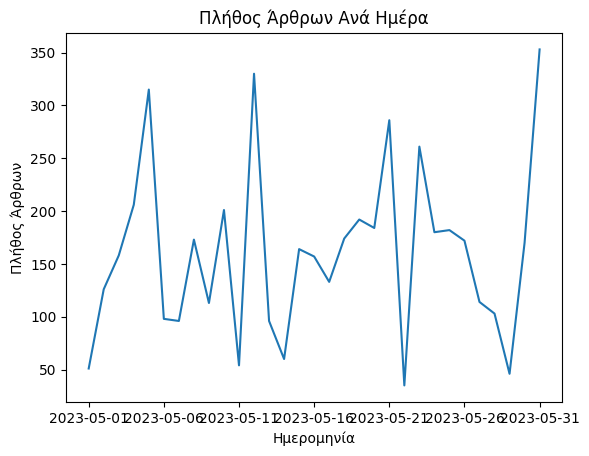

In [ ]:

#πώς μεταβάλεται το πλήθος της αρθρογραφίας από μέρα σε μέρα;
articles_per_day = df.groupby('date').size()
articles_per_day.plot(kind='line', xlabel='Ημερομηνία', ylabel='Πλήθος Άρθρων', title='Πλήθος Άρθρων Ανά Ημέρα')
plt.show()

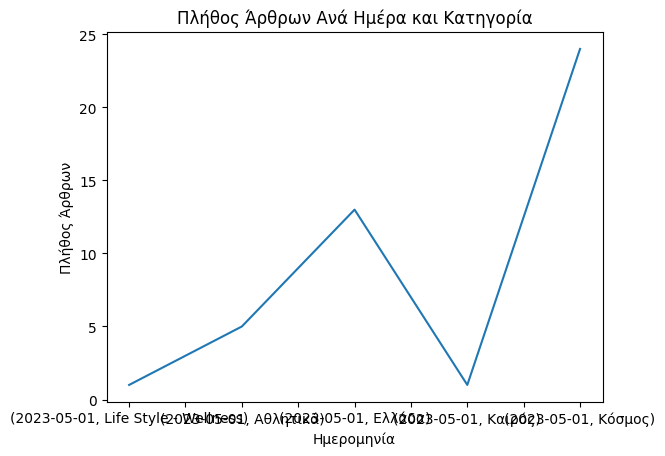

In [ ]:
#πώς μεταβάλεται το πλήθος της αρθρογραφίας συνολικά και ανά κατηγορία;
articles_per_day_category = df.groupby(['date', 'section']).size().head()
articles_per_day_category.plot(kind='line', xlabel='Ημερομηνία', ylabel='Πλήθος Άρθρων', title='Πλήθος Άρθρων Ανά Ημέρα και Κατηγορία')
plt.show()

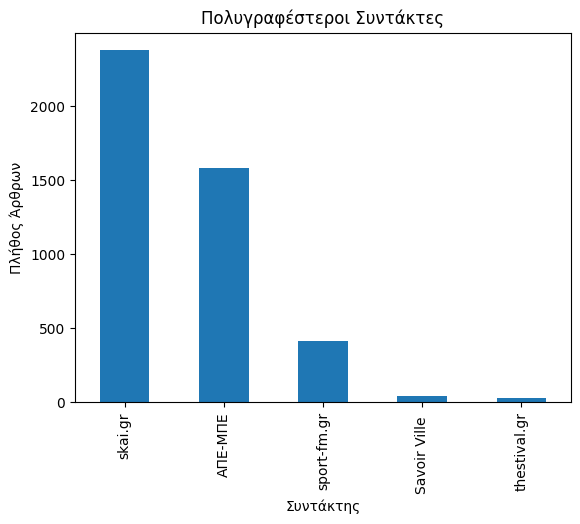

In [ ]:
#ποιοι είναι οι πολυγραφέστεροι συντάκτες;
articles_per_author = df.groupby('author').size()
top_authors = articles_per_author.sort_values(ascending=False).head()
top_authors.plot(kind='bar', xlabel='Συντάκτης', ylabel='Πλήθος Άρθρων', title='Πολυγραφέστεροι Συντάκτες')
plt.show()

## Wordclouds

Τα wordclouds είναι ένα γράφημα που μας επιτρέπει να σχηματίσουμε μια γρήγορη άποψη για τη θεματολογία ενός κειμένου ή ενός σώματος κειμένων.

Μπορούμε να φτιάξουμε wordclouds για το σύνολο των κειμένων μας, αλλά μπορεί να είναι χρησιμότερο να το χρησιμοποιήσουμε σε στοχευμένα κείμενα.

Π.χ.: ας υποθέσουμε ότι από τα προηγούμενα γραφήματα είδαμε ότι το πλήθος της αρθρογραφίας μια συγκεκριμένη μέρα (ή σε ένα γκρουπ ημερών) είναι πολύ μεγαλύτερο από το μέσο όρο του πλήθους των άρθρων ανά ημέρα. Και πιο συγκεκριμένα, είναι μεγαλύτερο στην κατηγορία αθλητικά.

Αν φτιάξουμε ένα wordcloud μόνο για τα άρθρα της συγκεκριμένης κατηγορίας, της συγκεκριμένης ημέρας, θα βρούμε γρήγορα τις λέξεις που αφορούν το σημαντικό αθλητικό γεγονός εκείνης της ημέρας.

#### ΠΑΡΑΔΕΙΓΜΑ WORDCLOUD ME KEIMENO ΚΑΤΕΥΘΕΙΑΝ AΠΟ TH ΣΤΗΛΗ ΚΕΙΜΕΝΟΥ ΤΟΥ DATAFRAME

**!!!ΠΡΟΣΟΧΗ!!!** Eπειδή το dataframe φτιάχνεται από αρχείο που είναι στο drive μου, μην κάνετε uncomment και τρέξετε τα παρακάτω κελιά γιατί θα εξαφανιστούν τα outputs.

In [ ]:
# df = pd.read_excel("/content/drive/MyDrive/2023/teaching python/Lesson 9/efsyn_full_articles_ekloges_2023_7_5_2023.xlsx")
# df.tail()

In [ ]:
# df.dropna(inplace=True)
# df = df.reset_index(drop=True)

In [ ]:
# df['text'] = df[['title', 'full_text']].agg(' '.join, axis=1)

In [ ]:
# df[['date', "section"]].describe()

In [ ]:
# df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
# df['day'] = pd.DatetimeIndex(df['datetime']).day

In [ ]:
# df[df["section"]=="ΠΟΛΙΤΙΚΗ"].groupby("day", as_index=False)['title'].count().sort_values("title", ascending=False)

Βλέπω ότι τα περισσότερα άρθρα στην κατηγορία ΠΟΛΙΤΙΚΗ ήταν στις 6 Ιουνίου (τα δεδομένα μου είναι από 30/5 - 6/6 του 2023). Φιλτράρω το dataframe μου.

In [ ]:
# df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]

Ακριβώς αυτό το φίλτρο μπορώ να το βάλω στην παράμετρο του generate() στο wordcloud

In [ ]:
# wordcloud = WordCloud(
#     stopwords = nlp.Defaults.stop_words,
#     width = 2000,
#     height = 1000,
#     background_color = 'black'
#  ).generate(' '.join(df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]))
# fig = plt.figure(
#     figsize = (10, 8),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Κι αν θέλω να κάνω και lemmatization για να φύγουν οι διαφορετικές πτώσεις των ίδιων λέξεων:

In [ ]:
# wordcloud = WordCloud(
#     stopwords = nlp.Defaults.stop_words,
#     width = 2000,
#     height = 1000,
#     background_color = 'black'
#  ).generate(' '.join(token.lemma_ for token in nlp(' '.join(df[(df["section"]=="ΠΟΛΙΤΙΚΗ") & (df["day"]==6)]["text"]))))
# fig = plt.figure(
#     figsize = (10, 8),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()

Για όποιον θα ήθελε να παίξει με την εμφάνιση του wordcloud: https://amueller.github.io/word_cloud/auto_examples/index.html

## ΣΥΜΠΕΡΑΣΜΑΤΑ

Τέλος, γράψτε ένα σύντομο κείμενο για τα ευρήματα των αναλύσεών σας.


Η ανάλυση έδειξε ότι το πλήθος των άρθρων ποικίλλει σημαντικά από μέρα σε μέρα. Ορισμένες ημέρες παρουσιάζουν υψηλότερη δραστηριότητα, πιθανώς λόγω σημαντικών γεγονότων ή προγραμματισμένων δημοσιεύσεων.ωΑυτές οι ημέρες φαίνεται να είναι η 4ή, 11ή και 30κοστή στο διάστημα που εξετάζουμε.

Οι κατηγορίες "Κόσμος" και "Ελλάδα" έχουν τον μεγαλύτερο αριθμό άρθρων υποδηλώνοντας ότι αυτές οι θεματικές είναι πιο δημοφιλείς ή θεωρούνται πιο σημαντικές για τους αναγνώστες του skai.gr.

O συντάκτης "skai.gr" δημοσιεύει περισσότερα άρθρα σε σχέση με άλλους.

Παρουσιάζεται οτι την 1η Μαίου του 2023 δημοσιευτηκάν περισσότερα αρθρά στην κατηγορία κόσμος.
